In [7]:
import pandas as pd
import numpy as np

In [9]:
data = np.load('D:\\data\\mnist.npz')

In [12]:
data.files

['x_test', 'x_train', 'y_train', 'y_test']

In [15]:
x_test = data['x_test']

In [ ]:
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])



In [23]:
max([max(sequence) for sequence in train_data])

9999

In [53]:
def vectorize_sequences(sequences,dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [25]:
x_train.shape

(25000, 10000)

In [27]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
y_train = np.asarray(trai_words).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
          

In [31]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [32]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [33]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_crossentropy])

In [34]:
x_val = x_train[:10000]

In [35]:
partial_x_train = x_train[10000:]

In [36]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))


Epoch 1/20
30/30 [==============================] - 4s 130ms/step - loss: 0.5504 - acc: 0.7791 - val_loss: 0.4278 - val_acc: 0.8685
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3416 - acc: 0.9003 - val_loss: 0.3490 - val_acc: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2520 - acc: 0.9220 - val_loss: 0.2909 - val_acc: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1944 - acc: 0.9391 - val_loss: 0.2946 - val_acc: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1591 - acc: 0.9498 - val_loss: 0.2820 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1319 - acc: 0.9605 - val_loss: 0.3048 - val_acc: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1101 - acc: 0.9686 - val_loss: 0.3128 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0930 - 

In [39]:
history_dict = history.history

In [41]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

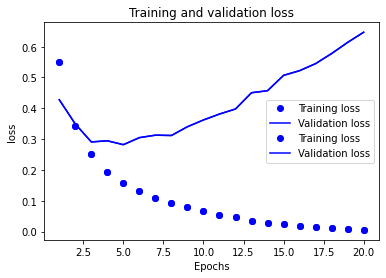

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)
plt.plot(epochs,loss_values,'bo',label = 'Training loss')
plt.plot(epochs,val_loss_values,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
plt.clf()

In [54]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.7081 - acc: 0.8510


[0.7080737352371216, 0.8509600162506104]

In [47]:
x_test.shape

(10000, 10000)

In [49]:
test_data.shape

(25000,)

In [50]:
train_data.shape

(25000,)

In [51]:
x_train.shape

(25000, 10000)

In [52]:
y_train.shape

(25000,)

In [81]:
data  = np.load("D:/data/boston_housing.npz")

In [83]:
data.files

['y', 'x']

In [86]:
tarin_data = data['x']

In [87]:
train_data.shape

(25000,)

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(x,w) + b
    y += torch.normal(0,0.01,y.shape)
    return x , y.reshape((-1,1))

In [6]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

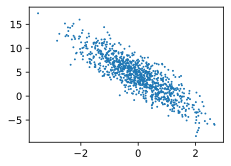

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1)

In [10]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #随机读取
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+
                                                  batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]
batch_size = 10
for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[ 0.6448,  1.8071],
        [ 0.4476,  0.7928],
        [-0.3060, -0.6131],
        [ 2.4217,  0.7128],
        [ 0.3595, -0.2478],
        [-0.9857, -0.2462],
        [-0.5953,  0.1720],
        [-1.6899, -1.3843],
        [ 1.0279, -0.9703],
        [ 1.2265, -0.0356]]) 
 tensor([[-0.6450],
        [ 2.3926],
        [ 5.6735],
        [ 6.6121],
        [ 5.7562],
        [ 3.0540],
        [ 2.4196],
        [ 5.5269],
        [ 9.5525],
        [ 6.7903]])


In [11]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
def linreg(x,w,b):
    return torch.matmul(x,w) + b

In [12]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
N,C,W,H = 1000,3,28,28
X = torch.randn((N,C,W,H))
print(X.view(-1,C,784).shape)

torch.Size([1000, 3, 784])


In [6]:
print(X.size())
X =X.unsqueeze(0)
print(X.size())
X = X.squeeze(0)
print(X.size())

torch.Size([1000, 3, 28, 28])
torch.Size([1, 1000, 3, 28, 28])
torch.Size([1000, 3, 28, 28])


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data
from torchvision import datasets,transforms
from torch.autograd import Variable

In [ ]:
BATCH_SIZE = 64


In [ ]:
activation_fn = nn.ReLU()